In [2]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import numpy as np
import pandas as pd
from genealogy_aligner import Pedigree
import matplotlib.pyplot as plt
from genealogy_aligner.Aligner import DescMatchingAligner
import msprime as msp
import io
from IPython.display import SVG, display

In [3]:
print("Simulating from BALSAC pedigree...")
balsac = Pedigree.from_table('../data/balsac.tsv', header=True)

Simulating from BALSAC pedigree...


In [4]:
bpprobands = balsac.probands(use_time=False)

In [5]:
bsim = balsac.generate_msprime_simulations(model_after=None)
print("Done!")

Done!


In [6]:
bsim

(<tskit.trees.TreeSequence at 0x109003110>,
 {0: 302716,
  1: 302716,
  2: 302711,
  3: 302711,
  4: 408375,
  5: 408375,
  6: 408426,
  7: 408426,
  8: 409687,
  9: 409687,
  10: 416144,
  11: 416144,
  12: 416147,
  13: 416147,
  14: 417169,
  15: 417169,
  16: 417234,
  17: 417234,
  18: 677273,
  19: 677273},
  <genealogy_aligner.Traversal.Traversal at 0x108e2e450>])

In [7]:
ts = bsim[0]
print(ts.num_trees,ts.num_edges,ts.num_individuals)

4 23 253


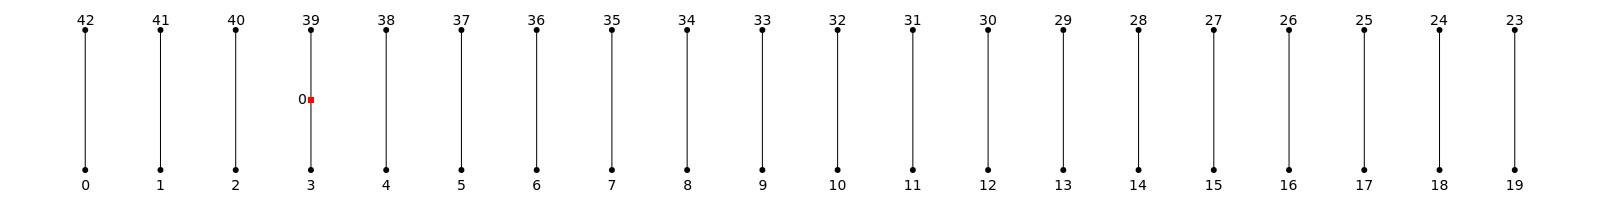

Tree 0 covers [0.00, 180776.37)


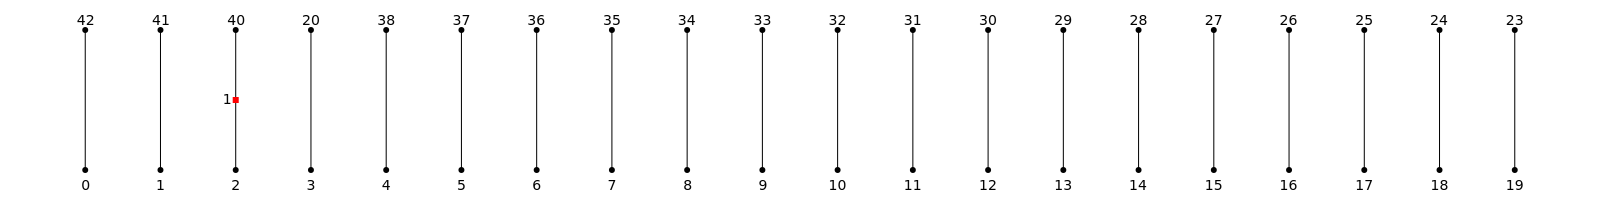

Tree 1 covers [180776.37, 335384.33)


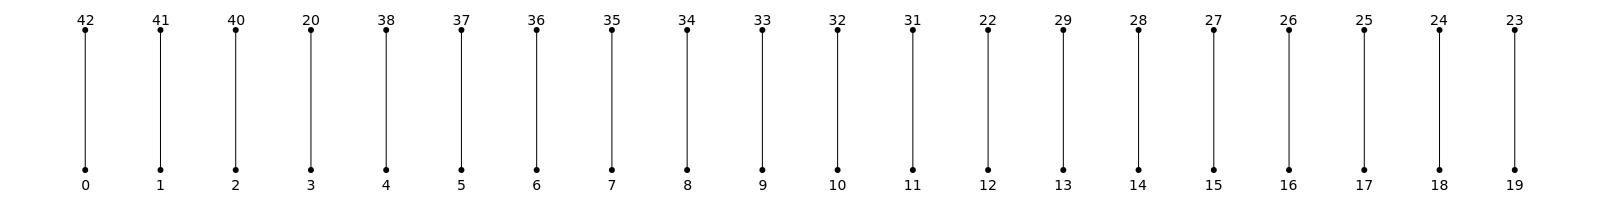

Tree 2 covers [335384.33, 445842.78)


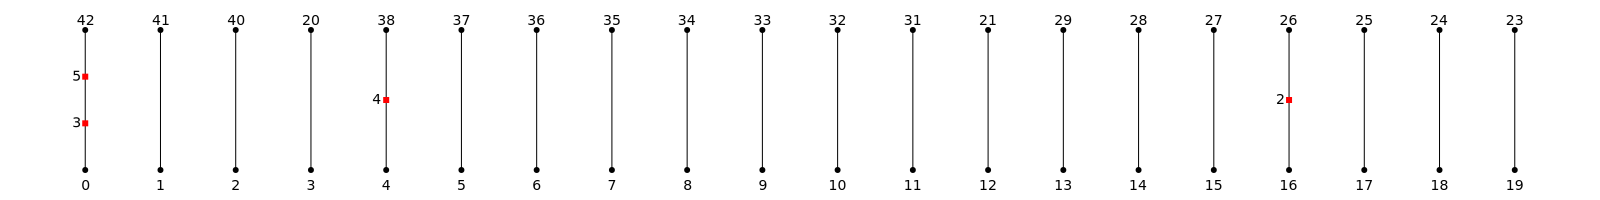

Tree 3 covers [445842.78, 1000000.00)


In [8]:
for tree in ts.trees():
    display(SVG(tree.draw(width = 1600, height = 200)))
    plt.show()
    plt.close()
    coalescent = []
    coalescent_gen = []
    print("Tree {} covers [{:.2f}, {:.2f})".format(
            tree.index, *tree.interval)
        )

In [9]:
times = []
for tree in ts.trees():
    allTimes = []
    info = {}
    for node1 in tree.nodes(order="postorder"):
            allTimes.append(tree.time(node1))
    for t in np.unique(allTimes):
        info[t]=0
    times.append(info)
print(times)

[{0.0: 0, 17.0: 0}, {0.0: 0, 17.0: 0}, {0.0: 0, 17.0: 0}, {0.0: 0, 17.0: 0}]


In [18]:
l = []
for tree in ts.trees():
    lst = []           
    for node1 in tree.nodes(order="postorder"):
        for node2 in tree.nodes(order="postorder"):
            if ((node1 != node2)& (tree.parent(node1) == tree.parent(node2)) & (tree.parent(node1) != -1)):
                lst.append(tree.parent(node1))
                coalEvents = np.unique(lst)
                print(lst)
                if (tree.time(node1) == tree.time(node2)):
                    times[tree.index][tree.time(node1)] = times[tree.index][tree.time(node1)]+1
                
    #l.append(coalEvents)
    #print(times[tree.index])
    #print(coalEvents.size)
    #plt.bar(times[tree.index].keys(), times[tree.index].values(), color='lightblue')
    #plt.show()
print(l)

[]
